In [9]:
import numpy as np
# 농어의 무게 예측
from matplotlib import pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)


# X_np dimension reshape
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [11]:
# knn회귀는 학습 데이터의 범위 밖의 데이터가 예측 입력값으로 들어올 때
# 항상 같은 값이 나오는 한계가 있음
# 이를 보완하기 위해 선형회귀 사용

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

print(model.predict([[50]]))

print(model.coef_, model.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535474


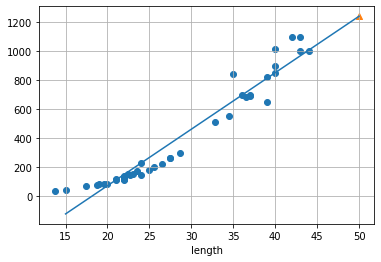

In [13]:
# 얻어낸 기울기와 절편으로 선형그래프생성
plt.scatter(X_train, y_train)
plt.plot([15, 50], [15*model.coef_+model.intercept_, 50*model.coef_+model.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.grid()
plt.show()

In [14]:
# 선형 그래프에 의하면 농어 무게가 0이하로 내려감 (비현실적)
# 다항회귀 이용하여 문제해결
train_poly = np.column_stack((X_train**2, X_train))
test_poly = np.column_stack((X_test**2, X_test))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [20]:
model.fit(train_poly, y_train)
print(model.predict([[50**2, 50]]))
print(model.coef_, model.intercept_)
print(model.coef_[0])

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278259
1.0143321093767304


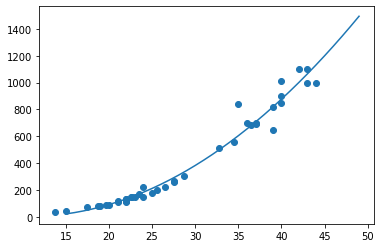

In [23]:
point = np.arange(15, 50)

plt.scatter(X_train, y_train)

plt.plot(point, model.coef_[0]*point**2
         + model.coef_[1]*point
         + model.intercept_)

In [22]:
print(model.score(train_poly, y_train))
print(model.score(test_poly, y_test))

0.9706807451768623
0.9775935108325121
